# Problem Statement:

Prepare a model for glass classification using KNN

Data Description:

RI : refractive index

Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

Mg: Magnesium

AI: Aluminum

Si: Silicon

K:Potassium

Ca: Calcium

Ba: Barium

Fe: Iron

Type: Type of glass: (class attribute)

1 -- building_windows_float_processed

 2 --building_windows_non_float_processed
 
 3 --vehicle_windows_float_processed
 
 4 --vehicle_windows_non_float_processed (none in this database)
 
 5 --containers
 
 6 --tableware
 
 7 --headlamps

# Import Libraries

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#import library to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#read the dataset
glass_df=pd.read_csv('glass.csv')
print(glass_df.shape)
glass_df

(214, 10)


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


There are 214 rowS and 10 columns in dats

In [6]:
Names=glass_df.columns[0:8]

# EDA

<AxesSubplot:xlabel='Type', ylabel='count'>

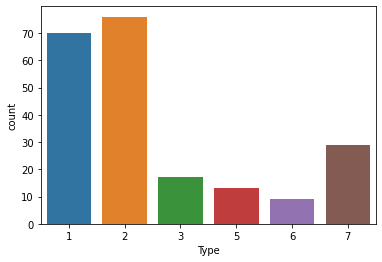

In [7]:
#plot countplot to summarize the glass types
sns.countplot(glass_df['Type'],label='Count')

### Countplot Show the counts of observations of glass classification in each categorical bin using bars.

In [8]:
#check information about data
glass_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [9]:
#checking Missing values 
glass_df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

#### There is no any missing value in dataset. 

In [10]:
#Generate descriptive statistics
glass_df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [11]:
#check unique Type of glass in dataset
glass_df.Type.unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [12]:
#use .nunique to calculate count of unique numbers.
glass_df.Type.nunique()

6

There Are 6 Types of glasses.

In [13]:
#Check duplicate rows in dataset
glass_df[glass_df.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


#### We found one duplicate row, we will drop it.

In [14]:
#Drop duplicate rows from dataset
glass_df=glass_df.drop(39)
print(glass_df.shape)

(213, 10)


# Correlation Analysis & Visualization

In [15]:
#Compute pairwise correlation of columns, excluding NA/null values.
glass_df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083,-0.160140
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374,0.508837
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426,-0.744195
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583,0.597432
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717,0.147725
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372,-0.012455
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314,0.002677
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729,0.574896
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000,-0.191090
Type,-0.160140,0.508837,-0.744195,0.597432,0.147725,-0.012455,0.002677,0.574896,-0.191090,1.000000


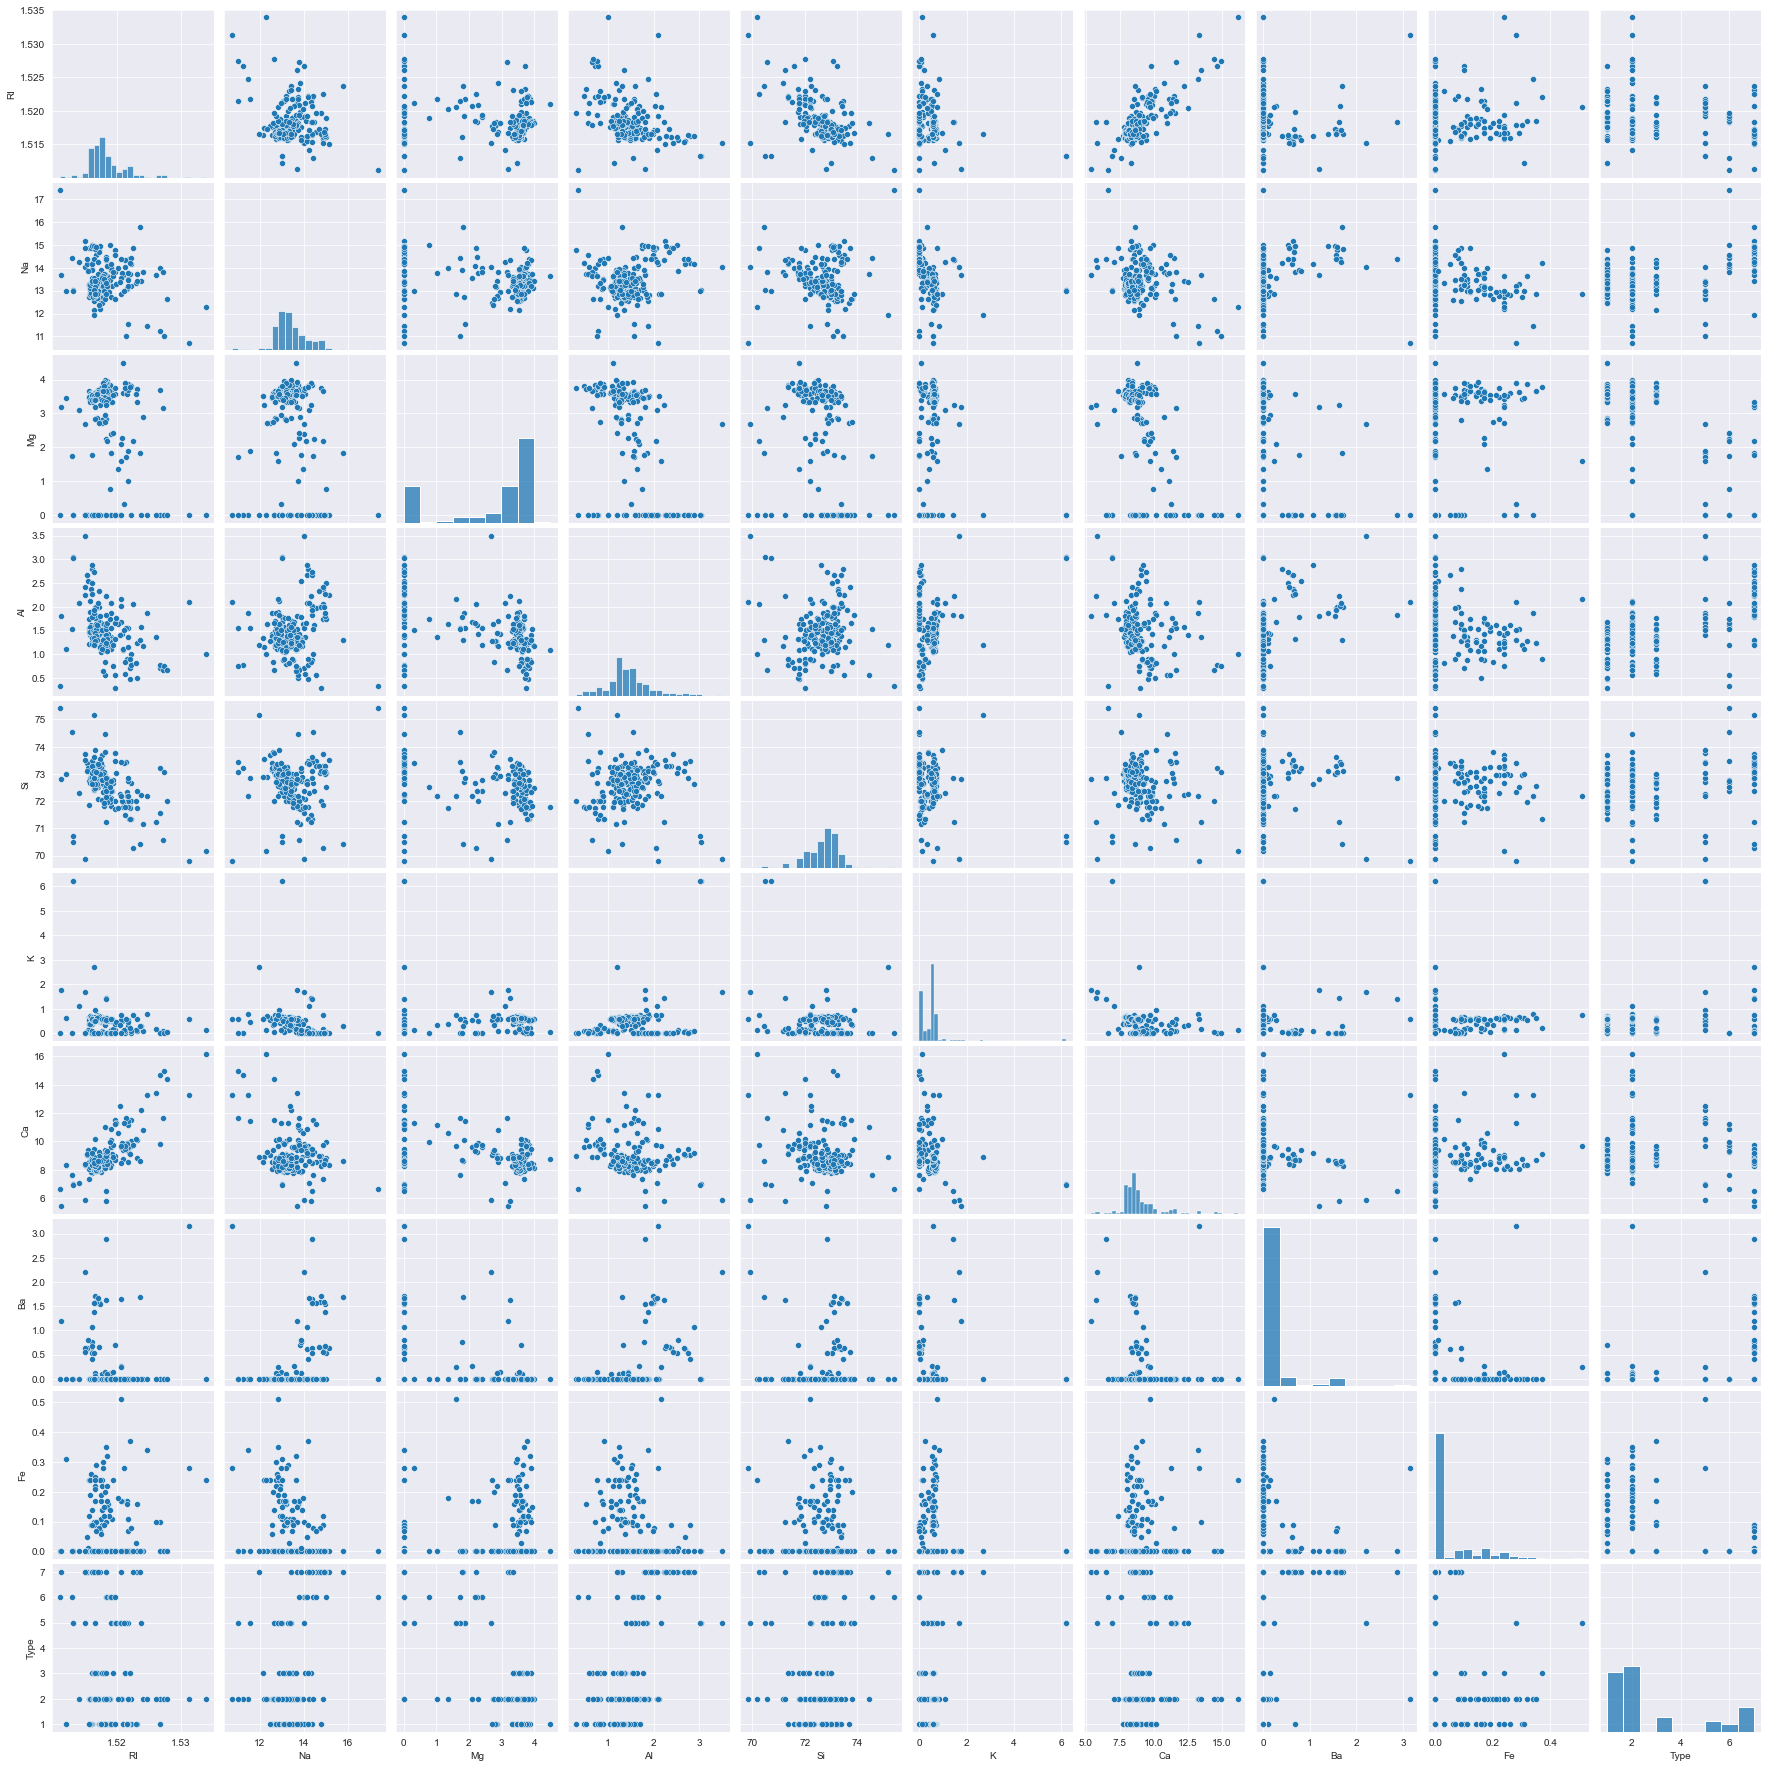

In [16]:
#Plot pairwise relationships in a dataset.
sns.set_style(style='darkgrid')
sns.pairplot(glass_df)

<AxesSubplot:>

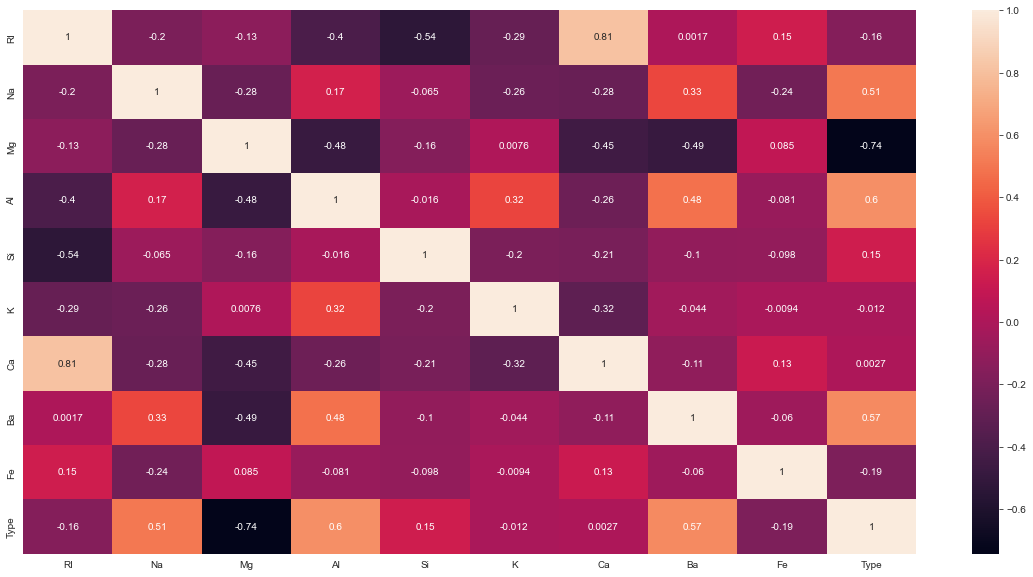

In [17]:
#Plot rectangular data as a color-encoded matrix
plt.figure(figsize=(20,10))
sns.heatmap(glass_df.corr(),annot=True,xticklabels=True)

### Between Calsium(Ca) and Refractive Index(RI) have Highest correlation,i.e 0.81

# Data Pre-Processing

In [18]:
#Extracting Independent and dependent Variable  
X=glass_df.iloc[:,0:9].values
y=glass_df.iloc[:,9].values


Use random state while splitting the data to ensure reproducibility and consistency



In [19]:
# Splitting the dataset into training and test set.
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [20]:
#Feature Scalling
from sklearn.preprocessing import StandardScaler
glass_scaled=StandardScaler()
X_train=glass_scaled.fit_transform(X_train)
X_test=glass_scaled.transform(X_test)

In [21]:
#Fitting KNN classifier to the training set
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=14,metric='minkowski',p=2)
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=14)

In [22]:
y_pred=classifier.predict(X_test)
y_pred

array([7, 1, 1, 5, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 7, 2, 1, 1, 1, 7, 7,
       7, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 7, 2, 2, 2, 1,
       1, 2, 1, 2, 1, 2, 1, 1, 7, 1], dtype=int64)

In [23]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred) 
cm

array([[13,  1,  0,  0,  0,  0],
       [ 8, 15,  0,  0,  0,  0],
       [ 5,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  1,  0,  0],
       [ 0,  1,  0,  0,  0,  1],
       [ 1,  0,  0,  0,  0,  6]], dtype=int64)

In [24]:
#Build Classification report
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           1       0.93      0.48      0.63        27
           2       0.65      0.79      0.71        19
           3       0.00      0.00      0.00         0
           5       0.50      1.00      0.67         1
           6       0.00      0.00      0.00         0
           7       0.86      0.86      0.86         7

    accuracy                           0.65        54
   macro avg       0.49      0.52      0.48        54
weighted avg       0.81      0.65      0.69        54



In [25]:
#check accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.6481481481481481

### KNN gives 64% Accuracy with randomly selected k=14 neighbors.

# Grid Search for Algorithm Tuning

In [26]:
#import libraries
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [27]:
n_neighbors=np.array(range(1,40))
param_grid=dict(n_neighbors=n_neighbors)


In [28]:
param_grid

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39])}

In [29]:
model2=KNeighborsClassifier()
grid=GridSearchCV(estimator=model2,param_grid=param_grid)
grid.fit(X,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [30]:
#calculate better value for k
print(grid.best_params_)

{'n_neighbors': 1}


#### Grid Search Give Best value for k is 1 .

# Visualizing the CV results

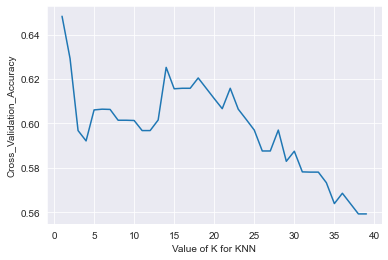

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
#choose k between 1 to 40
k_range=range(1,40)
k_scores=[]
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X,y,cv=5)
    k_scores.append(scores.mean())
#plot to see clearly
plt.plot(k_range,k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross_Validation_Accuracy')
plt.show()    


### From Above plot we can say that k=1 produces most accurate result.

## By using best value of k=1 we build KNN model.

In [32]:
model=KNeighborsClassifier(n_neighbors=1,metric='minkowski',p=2)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [33]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
CM= confusion_matrix(y_test, y_pred) 
CM

array([[13,  1,  0,  0,  0,  0],
       [ 6, 15,  1,  0,  1,  0],
       [ 1,  4,  1,  0,  0,  0],
       [ 0,  1,  0,  1,  0,  0],
       [ 0,  1,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  7]], dtype=int64)

In [34]:
#Build classification report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           1       0.93      0.65      0.76        20
           2       0.65      0.68      0.67        22
           3       0.17      0.50      0.25         2
           5       0.50      1.00      0.67         1
           6       0.50      0.50      0.50         2
           7       1.00      1.00      1.00         7

    accuracy                           0.70        54
   macro avg       0.62      0.72      0.64        54
weighted avg       0.77      0.70      0.72        54



In [35]:
#check accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.7037037037037037

In [36]:
glass_df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [37]:
names=('RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe')

### After applying one of the hyper parameter tuning method Grid-Search CV, Now we get Accuracy 70.37% which is better than previous model.

### The best k value found to be 1.

### Also, we noticed that RI and Ca are highly correlated, this makes sense as it was found that the Refractive index of glass was found to increase with the increase in Ca.

# Show Results

In [38]:
sub = pd.DataFrame()
sub['Predict_Type'] = y_pred
sub['Original_Type'] = y_test
sub

,Predict_Type,Original_Type
0,7,7
1,1,1
2,2,2
3,5,5
4,1,3
5,2,2
6,1,2
7,2,2
8,1,1
9,2,2
